In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing, utils
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Import happiness data
#Read Happiness data for 2015
happiness2015=pd.read_csv('Happiness2015.csv')
happiness2015['Year'] = 2015
happiness2015= happiness2015[['Country', 'Happiness Score','Year']]

#Read Happiness data for 2016
happiness2016=pd.read_csv('Happiness2016.csv')
happiness2016['Year'] = 2016
happiness2016= happiness2016[['Country', 'Happiness Score','Year']]
  
#Read Happiness data for 2017
happiness2017=pd.read_csv('Happiness2017.csv')
happiness2017['Year'] = 2017
happiness2017= happiness2017[['Country', 'Happiness.Score','Year']]

#Rename column  
happiness2017['Happiness Score']=happiness2017['Happiness.Score']
del happiness2017['Happiness.Score']


In [34]:
#Import UN data: lifeExpectancy, EducationIndex, GDPperCapita
lifeExpectancy = pd.read_csv("Life_expectancy_Index.csv", skiprows=1, encoding='iso-8859-1')
GDPperCapita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_422141.csv", skiprows=4, encoding='iso-8859-1')
EducationIndex = pd.read_csv("Education_Index.csv", skiprows=1, encoding='iso-8859-1')


In [35]:
#Extract 2015,2016, and 2017 data

#Extract only 2015 data for training
lifeExpectancy = lifeExpectancy[['Country', '2015']]
lifeExpectancy['lifeExpectancy'] = lifeExpectancy['2015']
del lifeExpectancy['2015']

#Extract only 2015 data for training
EducationIndex = EducationIndex[['Country', '2015']]
EducationIndex['EducationIndex'] = EducationIndex['2015']
del EducationIndex['2015']

#Extract only 2015 data for training
GDPperCapita['GDPperCapita'] = GDPperCapita['2015']
GDPperCapita = GDPperCapita[['Country Name', '2015']]
GDPperCapita['Country'] = GDPperCapita['Country Name']
del GDPperCapita['Country Name']

# Join all of 2015 data into a Dataframe
data2015 = happiness2015.merge(GDPperCapita, on='Country').merge(EducationIndex, on='Country').merge(
        lifeExpectancy, on='Country')

data2015['GDPperCapita'] = data2015['2015']
del data2015['2015']
del data2015['Year']

#These columns are "str" types, need to convert to numeric for correlation calculation
data2015["EducationIndex"] = pd.to_numeric(data2015["EducationIndex"])
data2015["lifeExpectancy"] = pd.to_numeric(data2015["lifeExpectancy"])
data2015["GDPperCapita"] = pd.to_numeric(data2015["GDPperCapita"])


In [51]:
#Setup train test split
Y = np.asarray(data2015['Happiness Score'])
X = np.asarray(data2015[['EducationIndex','lifeExpectancy','GDPperCapita']])

#Preprocess happiness data
Y = np.round(Y,1)

#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [52]:
#Predicting change in happiness model
#Using values for regressor found in regression.ipynb

model = Pipeline(steps=[('scaler', StandardScaler()),
                         ('classifier', KNeighborsRegressor(n_neighbors=17))])

model.fit(X_train, Y_train)
model_score = model.score(X_test, Y_test)

print("Prediction model score: " + str(model_score))


Prediction model score: 0.5917957513324577


In [55]:
# Predict happiness depending on change in education, life or gdp

scale_factor = [0.95,0.97,1,1.01,1.02,1.03,1.04,1.05]
X_test_scale = X_test

happiness_educ = [0]*len(scale_factor)
happiness_life = [0]*len(scale_factor)
happiness_gdp = [0]*len(scale_factor)
#happiness_educ = np.zeros((len(X_test[:,0]),len(scale_factor)))
#happiness_life = np.zeros((len(X_test[:,0]),len(scale_factor)))
#happiness_gdp = np.zeros((len(X_test[:,0]),len(scale_factor)))
column = 0

#test= model.predict(X_test)
#test.reshape((len(X_test[:,0]),1))

for factor in scale_factor:
    # Scale education
    X_test_scale[:,0] *= factor
    happiness_educ[column] = model.predict(X_test_scale).transpose()
    X_test_scale = X_test
    # Scale life
    X_test_scale[:,1] *= factor
    happiness_life[column] = model.predict(X_test_scale).transpose()
    X_test_scale = X_test
    # Scale gdp
    X_test_scale[:,2] *= factor
    happiness_gdp[column] = model.predict(X_test_scale).transpose()
    X_test_scale = X_test
    column = column+1
    
happiness_educ = np.asarray(happiness_educ)
happiness_life = np.asarray(happiness_life)
happiness_gdp = np.asarray(happiness_gdp)


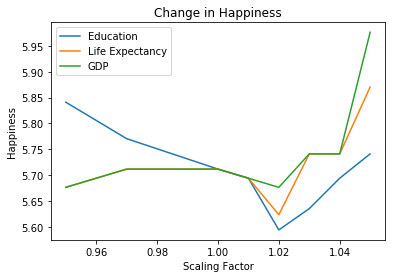

In [56]:
# Visualize happiness change on subset of data
happiness_educ_plot = happiness_educ[:,11]
happiness_life_plot = happiness_life[:,11]
happiness_gdp_plot = happiness_gdp[:,11]
#rint(happiness_educ_plot)
#rint(happiness_gdp_plot)

plt.plot(scale_factor, happiness_educ_plot)
plt.plot(scale_factor, happiness_life_plot)
plt.plot(scale_factor, happiness_gdp_plot)

plt.title('Change in Happiness')
plt.xlabel('Scaling Factor')
plt.ylabel('Happiness')
plt.legend(['Education','Life Expectancy', 'GDP'])


0.06818181818181818
